In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/Deep Learning/HW1/

In [3]:
# !pip3 install mat4py

In [4]:
# Import packages all we need
from mat4py import loadmat
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from __future__ import print_function
import keras
from keras.datasets import mnist

## Question 1
Please load ‘data.mat’ into your Python code, where you will find 𝑥, 𝑦 ∈ 𝑅^1001. Now do the following procedures.

In [5]:
data = loadmat('data.mat')

In [6]:
#Check Data
print('Data Keys :', data.keys())
print('Length of x and y :', len(data['x']),',', len(data['y']))

Data Keys : dict_keys(['x', 'y'])
Length of x and y : 1001 , 1001


### Q1-1 Plot the data
Plot the data using plot function.

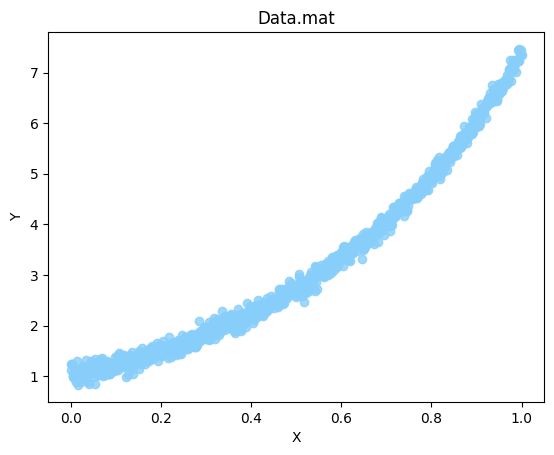

In [7]:
plt.scatter(data['x'], data['y'], alpha = 0.8, color = 'lightskyblue')
plt.title('Data.mat')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Q1-2 Line
Compute the least square line 𝑦 = 𝜃𝟎 + 𝑥𝜃𝟏 using the given data and overlay
the line over the given data.

In [8]:
x = data['x']
y = data['y']

# Linear Regression
regression = LinearRegression()
regression.fit(x, y)
y_pred_line = regression.predict(x)

intercept = regression.intercept_
coef = regression.coef_

mse_line = mean_squared_error(y, y_pred_line)

print('Interception : ', intercept[0])
print('Coeficient : ', coef[0][0])
print('MSE of Line: ', round(mse_line,4))

Interception :  0.20702719954940418
Coeficient :  5.98091716963754
MSE of Line:  0.2058


The polynomial of 1 degree:  y = 0.2070272 + 5.98091717x


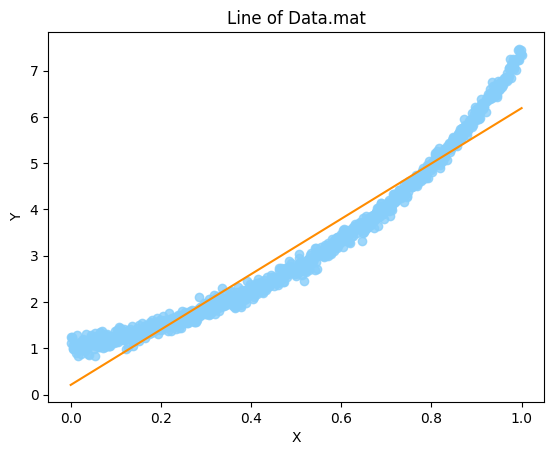

In [9]:
print('The polynomial of 1 degree: ', f'y = {round(intercept[0],8)} + {round(coef[0][0],8)}x')

plt.scatter(x, y, color = 'lightskyblue', alpha = 0.8)
plt.plot(x, y_pred_line, color = 'darkorange')
plt.title('Line of Data.mat')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Q1-3 Parabola
Compute the least square parabola ( i.e. second order polynomial 𝑦 = 𝜃𝟎 +
𝑥𝜃𝟏 + 𝜃𝟐𝑥^2 ) to fit the data.

In [10]:
x = data['x']
y = data['y']

#設定次方
poly = PolynomialFeatures(degree=2, include_bias=False)
regression_poly2 = make_pipeline(poly, LinearRegression())
regression_poly2.fit(x, y)
y_pred_parabola = regression_poly2.predict(x)

coef = regression_poly2.named_steps['linearregression'].coef_
intercept = regression_poly2.named_steps['linearregression'].intercept_

mse_parabola = mean_squared_error(y, y_pred_parabola)

print('Coeficient : ', coef)
print('Interception : ', intercept)
print('MSE of Parabola: ', round(mse_parabola,4))

Coeficient :  [[0.14356709 5.83735008]]
Interception :  [1.17894599]
MSE of Parabola:  0.0157


The polynomial of 2 degrees:  y = 1.17894599 + 0.14356709x + 5.83735008x^2


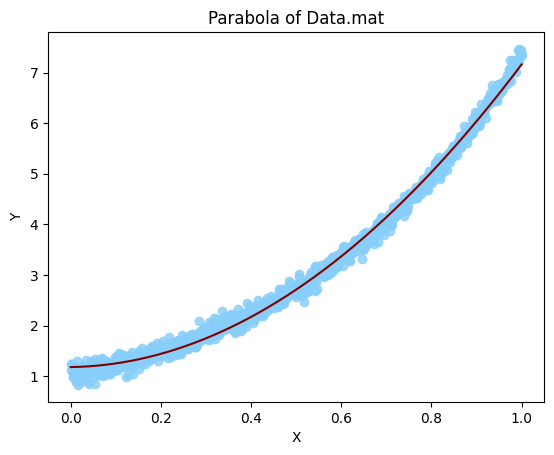

In [11]:
print('The polynomial of 2 degrees: ', f'y = {round(intercept[0],8)} + {round(coef[0][0],8)}x + {round(coef[0][1],8)}x^2')

plt.scatter(x, y, color = 'lightskyblue', alpha = 0.8)
plt.plot(x, y_pred_parabola, color = 'maroon')
plt.title('Parabola of Data.mat')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Q1-4 Quartic Curve
Compute the least square quartic curve ( 𝑦 = 𝜃𝟎 + 𝑥𝜃𝟏 + 𝜃𝟐𝑥^2 + 𝜃3𝑥^3 + 𝜃4𝑥^4 )
to fit the data.

In [12]:
x = data['x']
y = data['y']

poly = PolynomialFeatures(degree=4, include_bias=False)
regression_poly4 = make_pipeline(poly, LinearRegression())
regression_poly4.fit(x, y)
y_pred_qcurve = regression_poly4.predict(x)

coef = regression_poly4.named_steps['linearregression'].coef_
intercept = regression_poly4.named_steps['linearregression'].intercept_

mse_qcurve = mean_squared_error(y, y_pred_qcurve)

print('Coeficient : ', coef)
print('Interception : ', intercept)
print('MSE of Quartic Curve: ', round(mse_qcurve,4))

Coeficient :  [[ 1.59131656  3.86161799 -1.97292627  2.87810255]]
Interception :  [1.03121867]
MSE of Quartic Curve:  0.0104


The polynomial of 4 degrees:  y = 1.03121867 + 1.59131656x + 3.86161799x^2 + -1.97292627x^3 + 2.87810255x^4


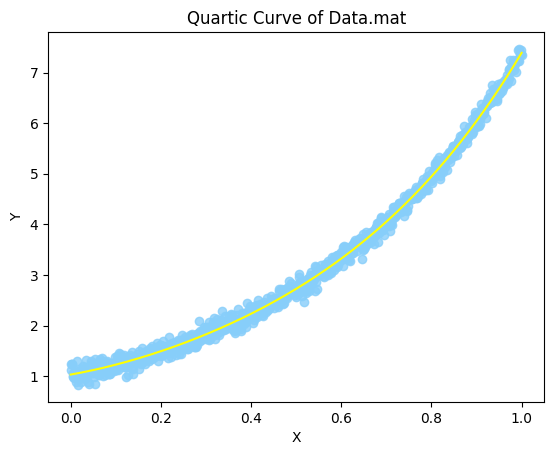

In [13]:
print('The polynomial of 4 degrees: ', f'y = {round(intercept[0],8)} + {round(coef[0][0],8)}x + {round(coef[0][1],8)}x^2 + {round(coef[0][2],8)}x^3 + {round(coef[0][3],8)}x^4')

plt.scatter(x, y, color = 'lightskyblue', alpha = 0.8)
plt.plot(x, y_pred_qcurve, color = 'yellow')
plt.title('Quartic Curve of Data.mat')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Q1-5 Compare with Line, Parabola, Quartic Curve
Explain which formulation ( line, parabola, cubic curve ) is more suitable for
this dataset and why? ( please calculate the mean square error for these two fitting equations )

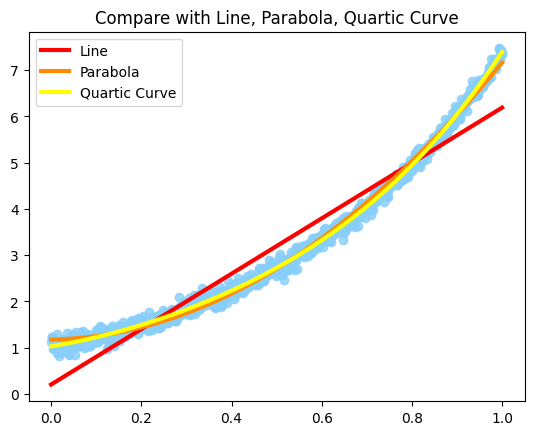

In [14]:
plt.scatter(x, y, color = 'lightskyblue', alpha = 0.8)

line, = plt.plot(x, y_pred_line, color = 'red', linewidth = 3, label = 'Line')
parabola, = plt.plot(x, y_pred_parabola, color = 'darkorange', linewidth = 3, label = 'Parabola')
qcurve, = plt.plot(x, y_pred_qcurve, color = 'yellow', linewidth = 3, label = 'Quartic Curve')

plt.legend(handles = [line, parabola, qcurve], loc='upper left')
plt.title('Compare with Line, Parabola, Quartic Curve')
plt.show()

In [15]:
print('MSE of Line : ', round(mse_line,4))
print('MSE of Parabola : ', round(mse_parabola,4))
print('MSE of Quartic Curve: ', round(mse_qcurve,4))
print('----------------------------------')
print('Min of MSE : ', round(min(mse_line, mse_parabola, mse_qcurve),4), '[Quartic Curve]')

MSE of Line :  0.2058
MSE of Parabola :  0.0157
MSE of Quartic Curve:  0.0104
----------------------------------
Min of MSE :  0.0104 [Quartic Curve]


## Question 2
Following the previous two questions, please randomly select 30 data samples for 200 times and plot these 200 lines ( 𝑦 = 𝜃𝟎 + 𝑥𝜃𝟏 ) and quartic curves ( 𝑦 = 𝜃𝟎 + 𝑥𝜃𝟏 + 𝜃𝟐𝑥^2 + 𝜃3𝑥^3 + 𝜃4𝑥^4 ) in two separate figures, one for lines and the other for quartic curves. Explain these visualizations based on the bias and variance.

In [16]:
x = data['x']
y = data['y']

In [17]:
def select_random(x, y):
    sample_x = []
    sample_y = []

    # select 30 samples
    n = 30
    for i in range(200): # 200times
        indexs = np.random.randint(0, len(x), n)

        set_x = []
        set_y = []

        for index in indexs:
            select_x = x[index]
            select_y = y[index]

            set_x.append(select_x)
            set_y.append(select_y)

        sample_x.append(set_x)
        sample_y.append(set_y)

    return sample_x, sample_y

Plot 200 lines with each 30 samples.

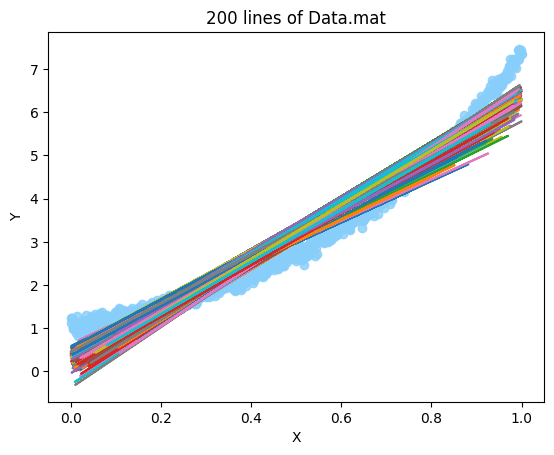

In [18]:
np.random.seed(seed=200)
sample_x, sample_y = select_random(x, y)

plt.scatter(x, y, color = 'lightskyblue', alpha = 0.8)
plt.title('200 lines of Data.mat')
plt.xlabel("X")
plt.ylabel("Y")

# plot 200 lines
sample_y_pred_line = []
var_line = []
bias_line = []
for i in range(200):
    regression = LinearRegression()
    regression.fit(sample_x[i], sample_y[i])
    y_pred_line = regression.predict(sample_x[i])

    sample_y_pred_line.append(y_pred_line)

    # Caculate Bias and Variance
    bias = np.mean((y_pred_line - sample_y[i])**2)
    bias_line.append(bias)
    expected_value = np.mean(y_pred_line, axis = 0)
    variance = np.mean((y_pred_line - expected_value) ** 2)
    var_line.append(variance)

    plt.plot(sample_x[i], y_pred_line)

plt.show()

Plot 200 quartic curves with each 30 samples.

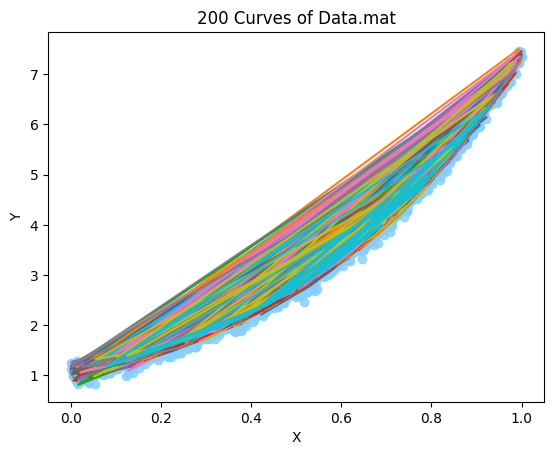

In [19]:
np.random.seed(seed=200)
sample_x, sample_y = select_random(x, y)

plt.scatter(x, y, color = 'lightskyblue', alpha = 0.8)
plt.title('200 Curves of Data.mat')
plt.xlabel("X")
plt.ylabel("Y")

# plot 200 curve
sample_y_pred_qcurve = []
var_qcurve = []
bias_qcurve = []
for i in range(200):
    poly = PolynomialFeatures(degree=4, include_bias=False)
    regression_poly4 = make_pipeline(poly, LinearRegression())
    regression_poly4.fit(sample_x[i], sample_y[i])
    y_pred_qcurve = regression_poly4.predict(sample_x[i])

    sample_y_pred_line.append(y_pred_qcurve)

    # Caculate Bias and Variance
    bias = np.mean((y_pred_qcurve - sample_y[i])**2)
    bias_qcurve.append(bias)
    expected_value = np.mean(y_pred_qcurve, axis = 0)
    variance = np.mean((y_pred_qcurve - expected_value) ** 2)
    var_qcurve.append(variance)

    plt.plot(sample_x[i], y_pred_qcurve)

plt.show()

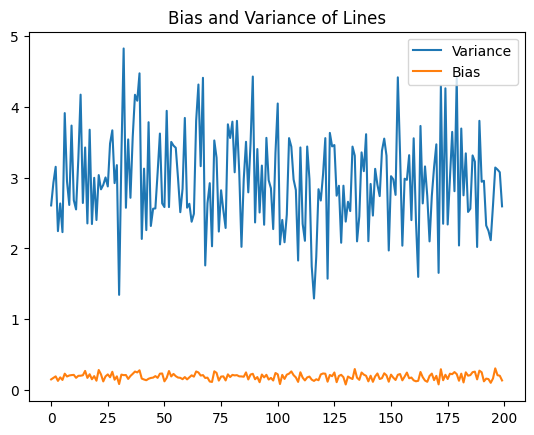

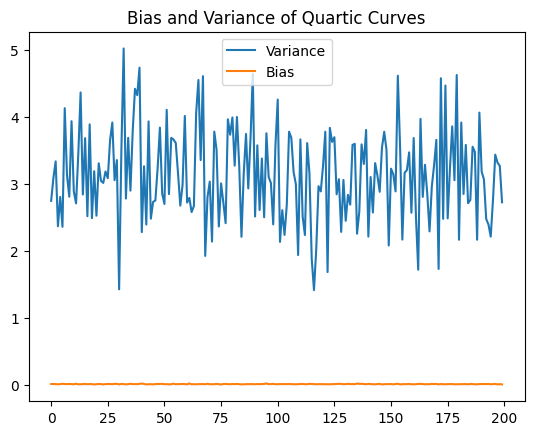

In [20]:
n = range(200)

plt.plot(n, var_line)
plt.plot(n, bias_line)
plt.legend(('Variance', 'Bias'), loc='best')
plt.title('Bias and Variance of Lines')
plt.show()

plt.plot(n, var_qcurve)
plt.plot(n, bias_qcurve)
plt.legend(('Variance', 'Bias'), loc='best')
plt.title('Bias and Variance of Quartic Curves')
plt.show()

## Question 3
In ‘train.mat,’ you can find 2-D points X=[x1, x2] and their corresponding labels Y=y. Please use logistic regression h(𝜽) = 1/( 1+𝑒^−𝑥𝜽^𝑇 ) to find the decision boundary (optimal 𝜽*) based on ‘train.mat.” Please report the test error on the test dataset ‘test.mat.’ (percentage of misclassified test samples)

In [21]:
train = loadmat('train.mat')
train

{'x1': [[5.1],
  [4.9],
  [4.7],
  [4.6],
  [5.0],
  [5.4],
  [4.6],
  [5.0],
  [4.4],
  [4.9],
  [5.4],
  [4.8],
  [4.8],
  [4.3],
  [5.8],
  [5.7],
  [5.4],
  [5.1],
  [5.7],
  [5.1],
  [5.4],
  [5.1],
  [4.6],
  [5.1],
  [4.8],
  [5.0],
  [5.0],
  [5.2],
  [5.2],
  [4.7],
  [4.8],
  [5.4],
  [5.2],
  [5.5],
  [4.9],
  [7.0],
  [6.4],
  [6.9],
  [5.5],
  [6.5],
  [5.7],
  [6.3],
  [4.9],
  [6.6],
  [5.2],
  [5.0],
  [5.9],
  [6.0],
  [6.1],
  [5.6],
  [6.7],
  [5.6],
  [5.8],
  [6.2],
  [5.6],
  [5.9],
  [6.1],
  [6.3],
  [6.1],
  [6.4],
  [6.6],
  [6.8],
  [6.7],
  [6.0],
  [5.7],
  [5.5],
  [5.5],
  [5.8],
  [6.0],
  [5.4]],
 'x2': [[3.5],
  [3.0],
  [3.2],
  [3.1],
  [3.6],
  [3.9],
  [3.4],
  [3.4],
  [2.9],
  [3.1],
  [3.7],
  [3.4],
  [3.0],
  [3.0],
  [4.0],
  [4.4],
  [3.9],
  [3.5],
  [3.8],
  [3.8],
  [3.4],
  [3.7],
  [3.6],
  [3.3],
  [3.4],
  [3.0],
  [3.4],
  [3.5],
  [3.4],
  [3.2],
  [3.1],
  [3.4],
  [4.1],
  [4.2],
  [3.1],
  [3.2],
  [3.2],
  [3.1],
  [2.3],
  [2.8

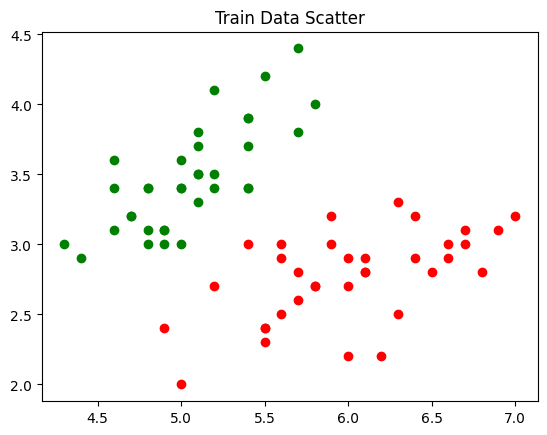

In [22]:
# scatter plot
plt.title('Train Data Scatter')
plt.scatter(train['x1'][:35], train['x2'][:35], c='g')
plt.scatter(train['x1'][35:], train['x2'][35:], c='r')
plt.show()

In [23]:
test = loadmat('test.mat')
test

{'x1': [[5.0],
  [5.5],
  [4.9],
  [4.4],
  [5.1],
  [5.0],
  [4.5],
  [4.4],
  [5.0],
  [5.1],
  [4.8],
  [5.1],
  [4.6],
  [5.3],
  [5.0],
  [6.0],
  [6.7],
  [6.3],
  [5.6],
  [5.5],
  [5.5],
  [6.1],
  [5.8],
  [5.0],
  [5.6],
  [5.7],
  [5.7],
  [6.2],
  [5.1],
  [5.7]],
 'x2': [[3.2],
  [3.5],
  [3.1],
  [3.0],
  [3.4],
  [3.5],
  [2.3],
  [3.2],
  [3.5],
  [3.8],
  [3.0],
  [3.8],
  [3.2],
  [3.7],
  [3.3],
  [3.4],
  [3.1],
  [2.3],
  [3.0],
  [2.5],
  [2.6],
  [3.0],
  [2.6],
  [2.3],
  [2.7],
  [3.0],
  [2.9],
  [2.9],
  [2.5],
  [2.8]],
 'y': [[1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [1],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0],
  [0]]}

In [24]:
# Train data
train_x = np.concatenate((train['x1'], train['x2']), axis=1) #2維座標
train_y = train['y'] #label

LR = LogisticRegression().fit(train_x, train_y)
pred_train_y = LR.predict(train_x)

print('Accuracy :', accuracy_score(train_y, pred_train_y))
print('Confusion Matrix: \n' , confusion_matrix(train_y, pred_train_y))


Accuracy : 1.0
Confusion Matrix: 
 [[35  0]
 [ 0 35]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Test data
test_x = np.concatenate((test['x1'], test['x2']), axis=1) #2維座標
test_y = test['y'] #label

pred_test_y = LR.predict(test_x)

print('Accuracy :', accuracy_score(test_y, pred_test_y))
print('Confusion Matrix: \n' , confusion_matrix(test_y, pred_test_y))

Accuracy : 1.0
Confusion Matrix: 
 [[15  0]
 [ 0 15]]


Find the decision boundary.

y = 5.739957193207684 + -2.5894065066866045 x + 2.7052721961394166 x^2


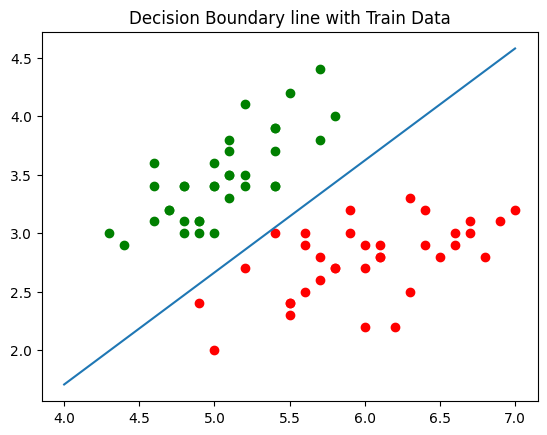

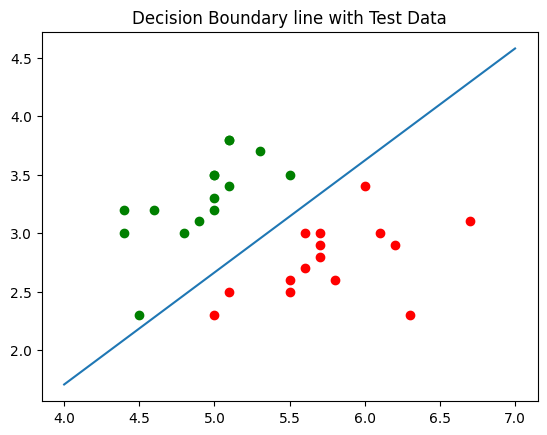

In [26]:
theta0 = LR.intercept_[0]
theta1 = LR.coef_[0][0]
theta2 = LR.coef_[0][1]

decision_boundary = (np.linspace(4, 7, 50), -1*(theta1/theta2)*np.linspace(4, 7, 50)-(theta0/theta2))

print(f'y = {theta0} + {theta1} x + {theta2} x^2')

plt.title('Decision Boundary line with Train Data')
plt.plot(decision_boundary[0], decision_boundary[1])
plt.scatter(train['x1'][:35], train['x2'][:35], c='g')
plt.scatter(train['x1'][35:], train['x2'][35:], c='r')
plt.show()

plt.title('Decision Boundary line with Test Data')
plt.plot(decision_boundary[0], decision_boundary[1])
plt.scatter(test['x1'][:15], test['x2'][:15], c='g')
plt.scatter(test['x1'][15:], test['x2'][15:], c='r')
plt.show()

## Question 4
Download the MNIST dataset.
Please randomly choose 5,000 different handwritten images from either the training or the testing dataset to construct your own dataset, where each digit has 500 data samples.

In [27]:
# input image dimensions 28x28
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


### Q4-1
Use the following code to show 50 images in your own dataset.

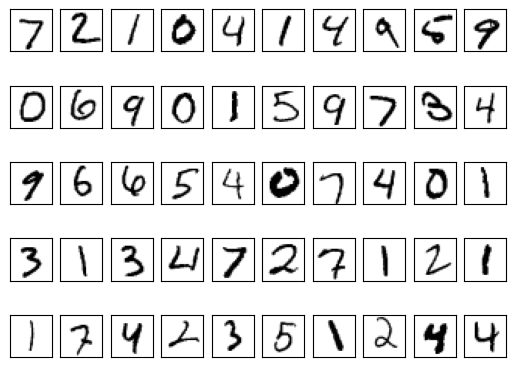

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def show_images(x):
    amount= 50
    lines = 5
    columns = 10
    number = np.zeros(amount)
    for i in range(amount):
        number[i] = y_test[i]
        # print(number[0])
    fig = plt.figure()
    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x[i,:,:], cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])
    plt.show()

show_images(x_test)

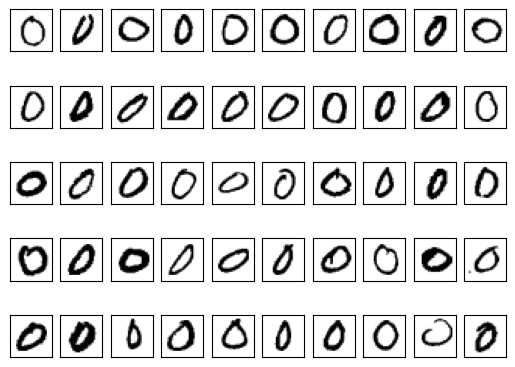

In [29]:
# 選取5000筆資料，數字0-9各500個
new_x_train = np.array([])
new_y_train = np.array([])

for i in range(0, 10):
    numbers = np.array(np.where(y_train == i)).reshape(-1)
    indexs = np.random.choice(numbers, 500)
    if len(new_x_train) == 0 and len(new_y_train) == 0:
        new_x_train = x_train[indexs]
        new_y_train = y_train[indexs]
    else:
        new_x_train = np.concatenate((new_x_train, x_train[indexs]), axis = 0)
        new_y_train = np.concatenate((new_y_train, y_train[indexs]), axis = 0)

show_images(new_x_train)

In [30]:
# Check Data
print('length of new_y_train: ', len(new_y_train))
print('select y_train :\n', new_y_train)

length of new_y_train:  5000
select y_train :
 [0 0 0 ... 9 9 9]


### Q4-2
Normalize the data (subtracting the mean from it and then dividing it by the standard deviation) and compute the eigenpairs for the covariance of the data (sorted in a descending order based on eigenvalues).

In [31]:
new_x_train = new_x_train.reshape(-1, img_rows*img_cols)

# Normalization(Mean、Standard Deviation)
mean = np.mean(new_x_train, axis=0)
std = np.std(new_x_train, axis=0)
new_x_train_normal = np.where(std != 0, (new_x_train - mean) / std, new_x_train)
#std為0的不列入計算

# Covariance Matrix
cov_matrix = np.cov(new_x_train_normal, rowvar=False)
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)

# 將eigenvalues透過Des排序，取得排序後的index(即sorted_des)
# 因為sort會從小排到大，所以這邊會使用-eigen_value(也可以使用flip)
sorted_des = np.argsort(-eigen_value)

eig_value = eigen_value[sorted_des]
eig_vector = eigen_vector[:,sorted_des]
print(f'eig_value : {eigen_value.shape}')
print(f'eig_vector : {eigen_vector.shape}')
print(eigen_value[:4])
print(eigen_vector[:4])

<ipython-input-31-bc31f7581002>:6: RuntimeWarning: invalid value encountered in divide
  new_x_train_normal = np.where(std != 0, (new_x_train - mean) / std, new_x_train)


eig_value : (784,)
eig_vector : (784, 784)
[38.50749418 29.70601689 26.89433405 20.761659  ]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Q4-3
Please use PCA to reduce the 784 dimensional data to that with 500, 300, 100, and 50 dimensions, and then show 10 decoding results for each digit, respectively. How do you interpret these results?

Dimensions : 500


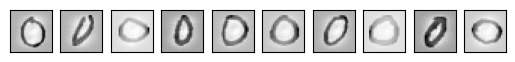

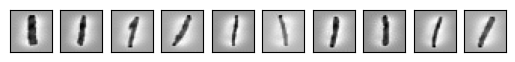

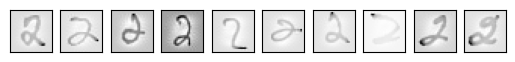

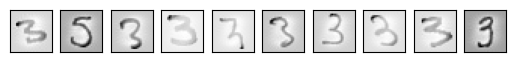

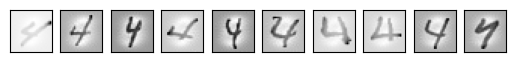

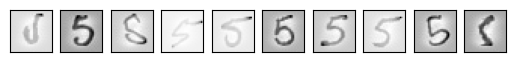

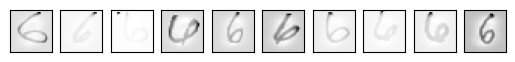

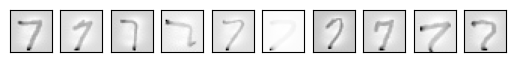

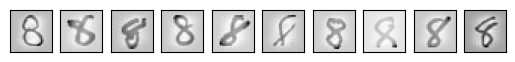

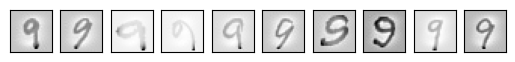

Dimensions : 300


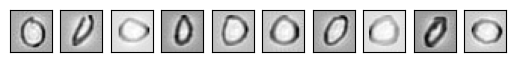

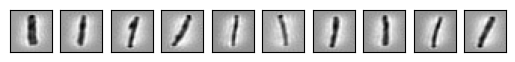

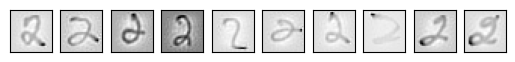

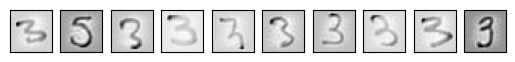

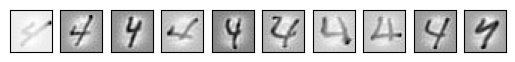

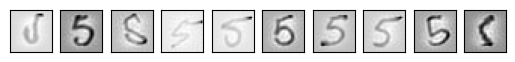

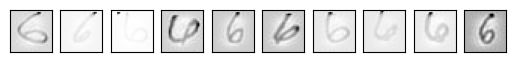

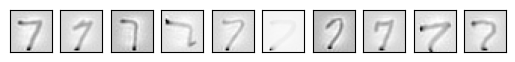

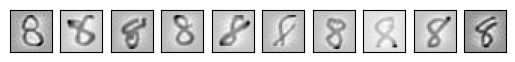

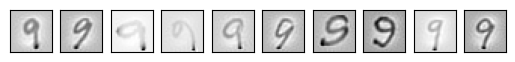

Dimensions : 100


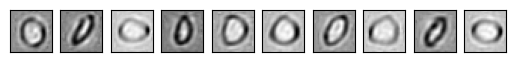

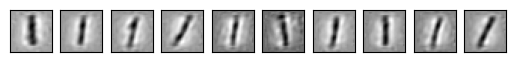

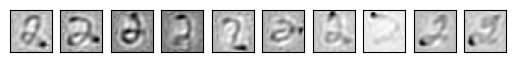

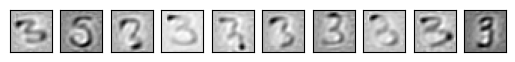

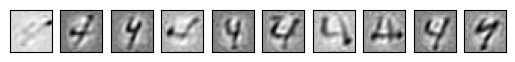

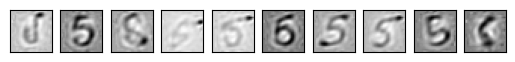

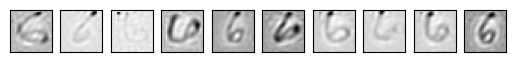

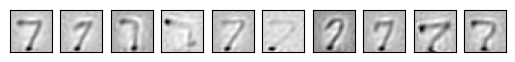

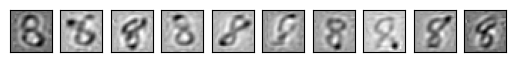

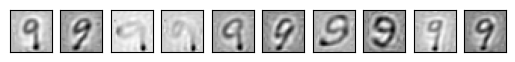

Dimensions : 50


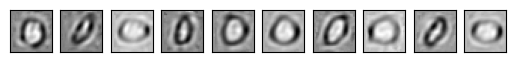

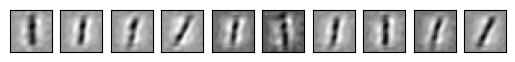

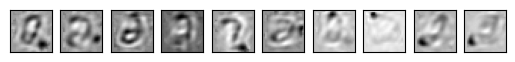

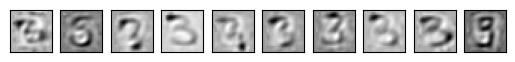

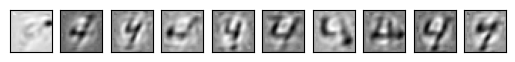

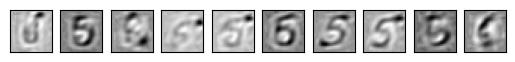

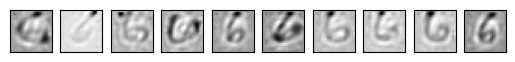

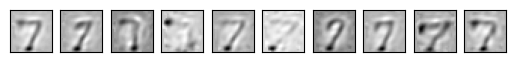

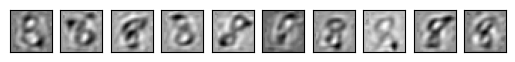

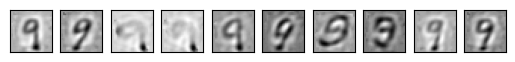

In [32]:
from sklearn.decomposition import PCA

dims = [500, 300, 100, 50]

# 因為前面做normalize的時候將3維的圖片reshape成2維，這邊要再改回來
def show_images_recover(x):
    amount = x.shape[0]
    lines = 5
    columns = 10
    fig = plt.figure()
    for i in range(amount):
        ax = fig.add_subplot(lines, columns, 1 + i)
        plt.imshow(x[i, :].reshape(28, 28), cmap='binary')
        plt.sca(ax)
        ax.set_xticks([], [])
        ax.set_yticks([], [])
    plt.show()

for dim in dims:
    # 使用PCA降維
    pca = PCA(n_components=dim)
    pca_x_train = pca.fit_transform(new_x_train_normal)

    # 將標準化後的資料轉回原始資料
    decoded_data = pca.inverse_transform(pca_x_train)

    print('Dimensions :', dim)
    # 每組DIM都包含每個數字的10個結果
    for digit in range(10):
        show_images_recover(decoded_data[digit * 500:digit * 500 + 10])